In [25]:
from minisom import MiniSom
import bokeh
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon
import numpy as np
import pandas as pd

In [13]:


dat2 = pd.read_csv("../../../../../bigcontest/data/preprocessed/dat2.csv")

In [6]:
dat2.columns

Index(['Unnamed: 0', 'user_id', 'CompleteIDCertification', 'EndLoanApply',
       'GetCreditInfo', 'Login', 'OpenApp', 'SignUp', 'StartLoanApply',
       'UseDSRCalc', 'UseLoanManage', 'UsePrepayCalc', 'ViewLoanApplyIntro'],
      dtype='object')

In [14]:
user = dat2.loc[:,'user_id']
dat2.drop(['Unnamed: 0', 'user_id'], axis = True, inplace = True)

In [16]:
dat2.shape

(2902255, 11)

In [57]:
train, test = sklearn.model_selection.train_test_split(dat2, train_size = 0.7)

In [58]:
train

,CompleteIDCertification,EndLoanApply,GetCreditInfo,Login,OpenApp,SignUp,StartLoanApply,UseDSRCalc,UseLoanManage,UsePrepayCalc,ViewLoanApplyIntro
1299547,0,0,1,0,1,0,0,0,0,0,0
2138761,0,0,1,0,1,0,0,0,1,0,0
1874505,0,0,1,1,1,0,0,0,1,0,0
2704457,0,1,0,1,1,0,1,0,1,0,1
1104826,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2704350,1,1,0,0,1,0,1,0,0,0,1
2816059,1,1,0,0,0,0,1,0,0,0,1
2035901,1,1,0,1,1,0,1,0,1,0,1
810758,1,1,1,0,1,0,1,0,0,0,1


In [66]:
map_n= [n for n in range(2,6)]
para_sigma= [np.round(sigma*0.1,2) for sigma in range(1,10)]
para_learning_rate= [np.round(learning_rate*0.1,2) for learning_rate in range(1,10)]
indexxx = 0

#결과 값을 담을 리스트 res 생성
res = []
#모든 조합에 대해 모델 생성 및 qe,te값 계산
for n in map_n:
    for sigma in para_sigma:
        for lr in para_learning_rate:
            s_time = pd.Timestamp.now()
            print('시작시간:',s_time,'\n')
            indexxx += 1
            try:
                #랜덤으로 초기값을 설정하는 경우
                estimator = MiniSom(n,n,11,sigma =sigma, learning_rate = lr, topology='hexagonal',random_seed=0)
                estimator.random_weights_init(train.values)
                estimator.train(train.values,1000,random_order=True)
                qe = estimator.quantization_error(train.values)
                #te = estimator.topographic_error(data.values)
                winner_coordinates = np.array([estimator.winner(x) for x in train.values]).T
                cluster_index = np.ravel_multi_index(winner_coordinates,(n,n))
                
                res.append([str(n)+'x'+str(n),sigma,lr,'random_init',qe,len(np.unique(cluster_index))])                
            except ValueError as e:
                print(e)
            e_time = pd.Timestamp.now()
            print('\n종료시간:',e_time,'\n총 소요시간:',e_time-s_time, indexxx)

시작시간: 2022-10-09 20:38:15.881964 


종료시간: 2022-10-09 20:38:40.398090 
총 소요시간: 0 days 00:00:24.516126 1
시작시간: 2022-10-09 20:38:40.398090 


종료시간: 2022-10-09 20:39:04.874488 
총 소요시간: 0 days 00:00:24.476398 2
시작시간: 2022-10-09 20:39:04.874488 


종료시간: 2022-10-09 20:39:29.839132 
총 소요시간: 0 days 00:00:24.964644 3
시작시간: 2022-10-09 20:39:29.839132 


종료시간: 2022-10-09 20:39:55.247082 
총 소요시간: 0 days 00:00:25.407950 4
시작시간: 2022-10-09 20:39:55.248077 


종료시간: 2022-10-09 20:40:21.148972 
총 소요시간: 0 days 00:00:25.900895 5
시작시간: 2022-10-09 20:40:21.149970 


종료시간: 2022-10-09 20:40:45.973986 
총 소요시간: 0 days 00:00:24.824016 6
시작시간: 2022-10-09 20:40:45.973986 


종료시간: 2022-10-09 20:41:10.253600 
총 소요시간: 0 days 00:00:24.279614 7
시작시간: 2022-10-09 20:41:10.253600 


종료시간: 2022-10-09 20:41:34.194044 
총 소요시간: 0 days 00:00:23.940444 8
시작시간: 2022-10-09 20:41:34.194044 


종료시간: 2022-10-09 20:41:58.313345 
총 소요시간: 0 days 00:00:24.119301 9
시작시간: 2022-10-09 20:41:58.313345 


종료시간: 2022-10-09 20:42:23.822971 
총 소


종료시간: 2022-10-09 21:10:58.268536 
총 소요시간: 0 days 00:00:24.976051 80
시작시간: 2022-10-09 21:10:58.268536 


종료시간: 2022-10-09 21:11:23.270224 
총 소요시간: 0 days 00:00:25.001688 81
시작시간: 2022-10-09 21:11:23.270224 


종료시간: 2022-10-09 21:11:48.215842 
총 소요시간: 0 days 00:00:24.945618 82
시작시간: 2022-10-09 21:11:48.215842 


종료시간: 2022-10-09 21:12:12.960930 
총 소요시간: 0 days 00:00:24.745088 83
시작시간: 2022-10-09 21:12:12.960930 


종료시간: 2022-10-09 21:12:37.929918 
총 소요시간: 0 days 00:00:24.968988 84
시작시간: 2022-10-09 21:12:37.929918 


종료시간: 2022-10-09 21:13:03.046996 
총 소요시간: 0 days 00:00:25.117078 85
시작시간: 2022-10-09 21:13:03.055100 


종료시간: 2022-10-09 21:13:27.876994 
총 소요시간: 0 days 00:00:24.821894 86
시작시간: 2022-10-09 21:13:27.876994 


종료시간: 2022-10-09 21:13:53.512771 
총 소요시간: 0 days 00:00:25.635777 87
시작시간: 2022-10-09 21:13:53.512771 


종료시간: 2022-10-09 21:14:21.776428 
총 소요시간: 0 days 00:00:28.263657 88
시작시간: 2022-10-09 21:14:21.776428 


종료시간: 2022-10-09 21:14:47.862012 
총 소요시간: 0 days 00:00:26.08558


종료시간: 2022-10-09 21:44:30.226884 
총 소요시간: 0 days 00:00:24.954609 159
시작시간: 2022-10-09 21:44:30.234898 


종료시간: 2022-10-09 21:44:55.465923 
총 소요시간: 0 days 00:00:25.231025 160
시작시간: 2022-10-09 21:44:55.465923 


종료시간: 2022-10-09 21:45:20.905128 
총 소요시간: 0 days 00:00:25.439205 161
시작시간: 2022-10-09 21:45:20.905128 


종료시간: 2022-10-09 21:45:46.444028 
총 소요시간: 0 days 00:00:25.538900 162
시작시간: 2022-10-09 21:45:46.444028 


종료시간: 2022-10-09 21:46:13.575358 
총 소요시간: 0 days 00:00:27.131330 163
시작시간: 2022-10-09 21:46:13.575358 


종료시간: 2022-10-09 21:46:40.838047 
총 소요시간: 0 days 00:00:27.262689 164
시작시간: 2022-10-09 21:46:40.838047 


종료시간: 2022-10-09 21:47:08.303686 
총 소요시간: 0 days 00:00:27.465639 165
시작시간: 2022-10-09 21:47:08.306221 


종료시간: 2022-10-09 21:47:35.564289 
총 소요시간: 0 days 00:00:27.258068 166
시작시간: 2022-10-09 21:47:35.564289 


종료시간: 2022-10-09 21:48:03.308634 
총 소요시간: 0 days 00:00:27.744345 167
시작시간: 2022-10-09 21:48:03.308634 


종료시간: 2022-10-09 21:48:30.453668 
총 소요시간: 0 days 00:00


종료시간: 2022-10-09 22:19:37.927051 
총 소요시간: 0 days 00:00:25.077550 238
시작시간: 2022-10-09 22:19:37.927051 


종료시간: 2022-10-09 22:20:03.046205 
총 소요시간: 0 days 00:00:25.119154 239
시작시간: 2022-10-09 22:20:03.046205 


종료시간: 2022-10-09 22:20:28.248658 
총 소요시간: 0 days 00:00:25.202453 240
시작시간: 2022-10-09 22:20:28.248658 


종료시간: 2022-10-09 22:20:53.489381 
총 소요시간: 0 days 00:00:25.240723 241
시작시간: 2022-10-09 22:20:53.489381 


종료시간: 2022-10-09 22:21:18.735770 
총 소요시간: 0 days 00:00:25.246389 242
시작시간: 2022-10-09 22:21:18.743780 


종료시간: 2022-10-09 22:21:44.084528 
총 소요시간: 0 days 00:00:25.340748 243
시작시간: 2022-10-09 22:21:44.084528 


종료시간: 2022-10-09 22:22:11.007291 
총 소요시간: 0 days 00:00:26.922763 244
시작시간: 2022-10-09 22:22:11.007291 


종료시간: 2022-10-09 22:22:38.030839 
총 소요시간: 0 days 00:00:27.023548 245
시작시간: 2022-10-09 22:22:38.030839 


종료시간: 2022-10-09 22:23:04.556229 
총 소요시간: 0 days 00:00:26.525390 246
시작시간: 2022-10-09 22:23:04.556229 


종료시간: 2022-10-09 22:23:31.156307 
총 소요시간: 0 days 00:00


종료시간: 2022-10-09 22:53:59.617295 
총 소요시간: 0 days 00:00:26.037748 317
시작시간: 2022-10-09 22:53:59.619345 


종료시간: 2022-10-09 22:54:25.662256 
총 소요시간: 0 days 00:00:26.042911 318
시작시간: 2022-10-09 22:54:25.662256 


종료시간: 2022-10-09 22:54:51.559689 
총 소요시간: 0 days 00:00:25.897433 319
시작시간: 2022-10-09 22:54:51.559689 


종료시간: 2022-10-09 22:55:17.473124 
총 소요시간: 0 days 00:00:25.913435 320
시작시간: 2022-10-09 22:55:17.473124 


종료시간: 2022-10-09 22:55:43.429749 
총 소요시간: 0 days 00:00:25.956625 321
시작시간: 2022-10-09 22:55:43.429749 


종료시간: 2022-10-09 22:56:09.508571 
총 소요시간: 0 days 00:00:26.078822 322
시작시간: 2022-10-09 22:56:09.508571 


종료시간: 2022-10-09 22:56:35.529400 
총 소요시간: 0 days 00:00:26.020829 323
시작시간: 2022-10-09 22:56:35.529400 


종료시간: 2022-10-09 22:57:01.805220 
총 소요시간: 0 days 00:00:26.275820 324


In [68]:
df_res = pd.DataFrame(res,columns=['map_size','sigma','learning_rate','init_method','qe','n_cluster']) 
df_res.shape
df_res.sort_values(by=['qe'],ascending=True,inplace=True,ignore_index=True)

<AxesSubplot:>

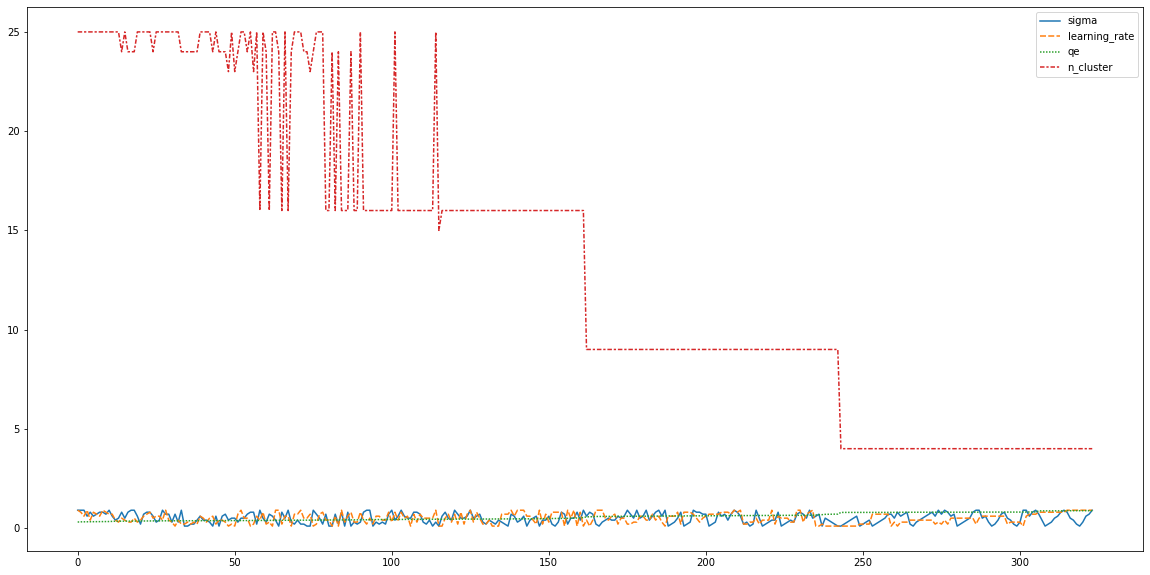

In [72]:
plt.figure(figsize=(20,10))
sns.lineplot(data = df_res)

In [71]:
df_res.head(10)

,map_size,sigma,learning_rate,init_method,qe,n_cluster
0,5x5,0.9,0.9,random_init,0.304411,25
1,5x5,0.9,0.8,random_init,0.313528,25
2,5x5,0.9,0.6,random_init,0.315459,25
3,5x5,0.6,0.9,random_init,0.315640,25
4,5x5,0.8,0.4,random_init,0.316409,25
5,5x5,0.6,0.8,random_init,0.323218,25
6,5x5,0.7,0.7,random_init,0.323457,25
7,5x5,0.8,0.6,random_init,0.323982,25
8,5x5,0.8,0.9,random_init,0.326664,25
9,5x5,0.7,0.8,random_init,0.328719,25


In [74]:
df_res.to_csv("minisom_result.csv", index = False, header = True)

In [60]:
s_time = pd.Timestamp.now()
print('시작시간:',s_time,'\n')

estimator = MiniSom(5,5,11,sigma =1, learning_rate = 1, topology='hexagonal',random_seed=0)
estimator.random_weights_init(train.values)
estimator.train(train.values,1000,random_order=True)
qe = estimator.quantization_error(train.values)
winner_coordinates = np.array([estimator.winner(x) for x in train.values]).T
cluster_index = np.ravel_multi_index(winner_coordinates,(5,5))

e_time = pd.Timestamp.now()
print('\n종료시간:',e_time,'\n총 소요시간:',e_time-s_time)

시작시간: 2022-10-09 20:33:00.119397 


종료시간: 2022-10-09 20:33:24.933581 
총 소요시간: 0 days 00:00:24.814184


In [1]:
xx, yy = estimator.get_euclidean_coordinates()
umatrix = estimator.distance_map()
weights = estimator.get_weights()

f = plt.figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.set_aspect('equal')

# iteratively add hexagons
# plotting the distance map as background
# 해당 셀과 다른 이웃들 간 거리를 표현, 밝을수록 가깝고, 어두울수록 멀다
for i in range(weights.shape[0]):
    for j in range(weights.shape[1]):
        wy = yy[(i, j)] * 2 / np.sqrt(3) * 3 / 4
        hex = RegularPolygon((xx[(i, j)], wy), 
                             numVertices=6, 
                             radius=.95 / np.sqrt(3),
                             facecolor=matplotlib.cm.Blues(umatrix[i, j]), 
                             alpha=.4, 
                             edgecolor='gray')
        plot = ax.add_patch(hex)

#output노드에 해당하는 클러스터 종류 및 밀도 확인         
cnt=[]
for c in np.unique(cluster_index):
        x_= [estimator.convert_map_to_euclidean(estimator.winner(x))[0] + (2*np.random.rand(1)[0]-1)*0.4 for x in train.values[cluster_index==c]]
        y_= [estimator.convert_map_to_euclidean(estimator.winner(x))[1] + (2*np.random.rand(1)[0]-1)*0.4 for x in train.values[cluster_index==c]]
        y_= [(i* 2 / np.sqrt(3) * 3 / 4) for i in y_]
    
        plot = sns.scatterplot( x = x_,  y= y_ ,label='cluster='+str(c),alpha=.7)
        
        #클러스터에 속한 데이터 개수 데이터프레임으로 출력
        cnt.append([c,len(x_)])

#클러스터별 개수를 표 형태로 출력 
df_cnt = pd.DataFrame(cnt,columns=['cluster이름','개수'])
df_cnt

#x축,y축 간격 설정 
xrange = np.arange(weights.shape[0])
yrange = np.arange(weights.shape[1])
plot = plt.xticks(xrange-.5, xrange)
plot = plt.yticks(yrange * 2 / np.sqrt(3) * 3 / 4, yrange)

#차트 우측에 color bar생성
divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = colorbar.ColorbarBase(ax_cb, cmap=matplotlib.cm.Blues, 
                            orientation='vertical', alpha=.4)
cb1.ax.get_yaxis().labelpad = 16
plot = cb1.ax.set_ylabel('distance from neurons in the neighborhood',
                  rotation=270, fontsize=16)
plot = plt.gcf().add_axes(ax_cb)

NameError: name 'estimator' is not defined